In [14]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

## NewYork City Bike
在预测模型训练之前对数据进行清洗， 数据清洗的代码已经整理在 `citibikeUtil.py`中，预测器的代码已经整理在`predictor.py`中，
`citybikeDraw.py`是用来生成图片的文件 `citybikeMetrics.py`计算指标

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

from citybikeUtil import CB201808, CB201809, CB201810, CB201811, CB201812, CB201901

from predictor import DecisionTreePredictor, XGBoostPredictor

## DesTreePredictor

In [16]:
dt = DecisionTreePredictor()

### 训练模型

In [17]:
train_x, train_y = dt.get_train_vec([CB201810])
test_x, test_y = dt.get_train_vec([CB201810])
dt.train_model(train_x, train_y)
predict_y = dt.model.predict(test_x)

100%|██████████| 1/1 [00:17<00:00, 17.14s/it]


In [18]:
len(predict_y), len(test_y)

(744, 744)

### 根据预测结果的个数生成 时间间隔 

预测月份是11月份 freq代表频率 'H'代表小时 每小时生成一个

### 使用seaborn画图需要将数据合成df

In [19]:
date_index = pd.date_range(start='2018-10-01 00:00:00', periods=len(test_y), freq='H')
merge_data = {
    'predict': predict_y.tolist(),
    'real':  test_y['res'].tolist()
}
dt_df = pd.DataFrame(merge_data, index=date_index)

## 实验结果展示

In [20]:
sns.set(style="whitegrid")
sns.set_context(rc={"lines.linewidth": 2})

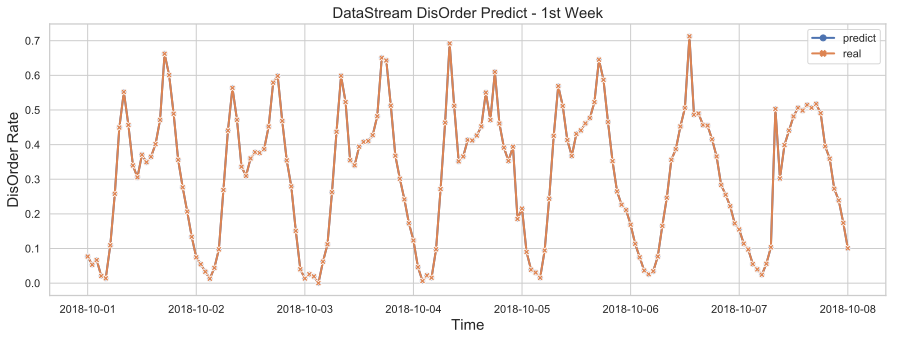

In [21]:
# plt.figure(figsize=(15, 5))
f, ax = plt.subplots(figsize = (15, 5))
# 设置图名称
ax.set_title('DataStream DisOrder Predict - 1st Week', fontsize=15)
# 设置X轴 Y轴 的label
ax.set_xlabel('Time',fontsize=15)
ax.set_ylabel('DisOrder Rate',fontsize=15)
sns.lineplot(size='event',
             markers=True,dashes=False,
             data=dt_df[:169])

## 保存模型为PMML

In [22]:
from sklearn2pmml.pipeline import PMMLPipeline
from sklearn2pmml import sklearn2pmml
from sklearn.tree import DecisionTreeRegressor

In [23]:
pipline = PMMLPipeline([('classifier', DecisionTreeRegressor())])
pipline.fit(train_x, train_y)

PMMLPipeline(steps=[('classifier', DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best'))])

In [24]:
sklearn2pmml(pipline, "./treemodel.pmml", with_repr=True)

In [26]:
train_y

,res
0,0.076923
1,0.053097
2,0.066667
3,0.020833
4,0.013986
5,0.109405
6,0.257981
7,0.449342
8,0.552090
9,0.456595
